In [84]:
import pandas as pd
import numpy as np
import ydf
import matplotlib.pyplot as plot

df = pd.read_csv("dam_data_imputed_navaldia.csv")


train_df = df.copy(True)
#train_df.columns
train_df = train_df.drop(columns=["ID", "Years Modified", "Assessment Date", "Assessment Date","Loss given failure - prop (Qm)","Loss given failure - liab (Qm)", "Loss given failure - BI (Qm)", "Total Loss Given Failure", "Expected Loss Value"])

test_df = train_df.copy(True)

for i in range(test_df.index.size):
    if (test_df.loc[i, "Inspection Frequency"] < 5):
        test_df.loc[i, "Inspection Frequency"] = 5

model = ydf.GradientBoostedTreesLearner(label="Probability of Failure", task=ydf.Task.REGRESSION).train(train_df)


Train model on 8878 examples
Model trained in 0:00:01.713049


In [85]:
model.describe()

In [86]:
ydf_prediction = model.predict(test_df)
#print(df["Probability of Failure"])
for i in range(test_df.index.size):
    test_df.loc[i, "Probability of Failure"] = ydf_prediction[i]
#print(test_df["Probability of Failure"])

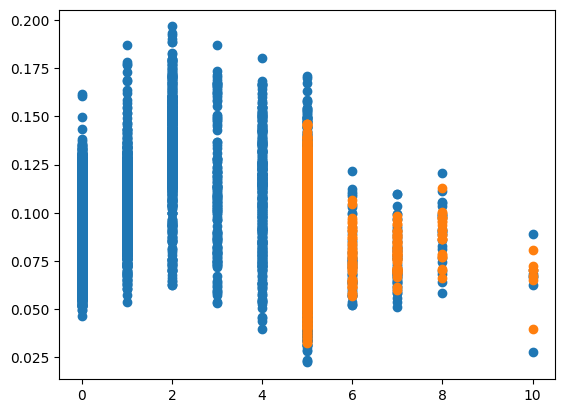

In [87]:
orig_x = train_df["Inspection Frequency"].to_numpy()
orig_y = train_df["Probability of Failure"].to_numpy()

new_x = test_df["Inspection Frequency"].to_numpy()
new_y = test_df["Probability of Failure"].to_numpy()

plot.scatter(orig_x, orig_y)
plot.scatter(new_x, new_y)

plot.show()


In [88]:
new_df = df.copy(True) 
new_df = new_df.replace(new_df["Probability of Failure"], pd.Series(new_y))

for i in range(new_df.index.size):
    new_df.loc[i, "Expected Loss Value"] = test_df.loc[i, "Probability of Failure"] * new_df.loc[i, "Total Loss Given Failure"] 

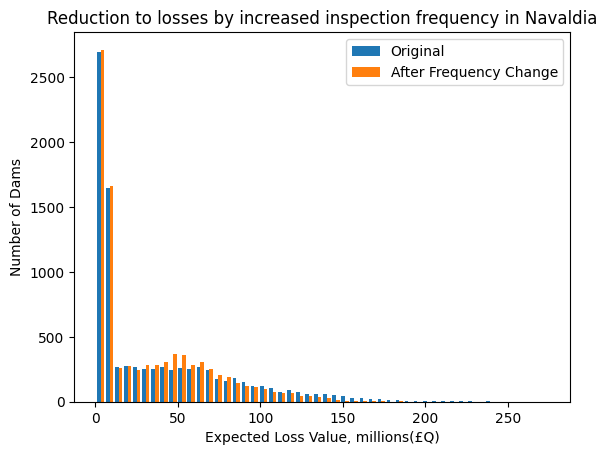

In [89]:
compare_new = new_df["Expected Loss Value"].to_numpy()
compare_old = df["Expected Loss Value"].to_numpy()
plot.hist([compare_old, compare_new], bins=50,label=["Original", "After Frequency Change"])
plot.xlabel("Expected Loss Value, millions(£Q)")
plot.ylabel("Number of Dams")
plot.title(f"Reduction to losses by increased inspection frequency in {df.loc[0, "Region"]}")
plot.legend()
plot.savefig(f"frequency_adjusted_expected_loss__{df.loc[0, "Region"]}_histogram.png")


In [95]:
import gov_expenditure

gov_expenditure.average_loss_percentile("machine_learning_frequency_adjusted_Flumevale.csv", 90, 100)
gov_expenditure.average_loss_percentile("dam_data_imputed_flumevale.csv", 90, 100)


23
Region: SOAD13695
Average Loss Given Failure: 1284.4660623229463
Expected Value: 132.9235118908066
Standard Deviation: 1584.1750679783083
Variance: 2509610.6460040775
Number of Dams: 353


22
Region: Flumevale
Average Loss Given Failure: 1257.0980169971672
Expected Value: 144.6399625552408
Standard Deviation: 404.6609108561247
Variance: 163750.45277490848
Number of Dams: 353




(np.float64(1257.0980169971672),
 np.float64(144.6399625552408),
 404.6609108561247,
 np.float64(163750.45277490848),
 353)

In [ ]:
new_df.to_csv(f"machine_learning_frequency_adjusted_{df.loc[0, "Region"]}.csv")